# **Author : Devarsh Patel**

# Task 3 : Prediction using Decision Tree Algorithm¶

**GRIP @ The Sparks Foundation**

For the given Iris dataset, create a Decision Tree classifier and visualized it graphically.

Dataset is standard Iris dataset that can be loaded through scikit-learn datasets

**Importing Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

**Importing Dataset**

In [8]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df = df.drop('Id',axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [12]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


We have <span class="girk">3 duplicate row</span>. But we leave them as it is 'cause it would <span class="mark">disrupt balance of class frequency</span>.

In [15]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [16]:
df.kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

In [17]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

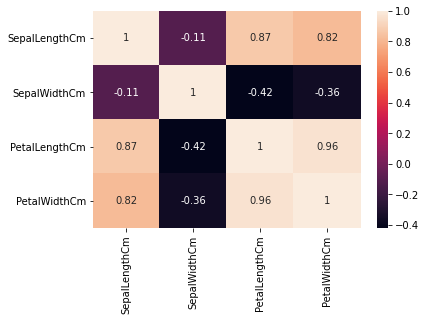

In [18]:
sns.heatmap(df.corr(),annot=True)

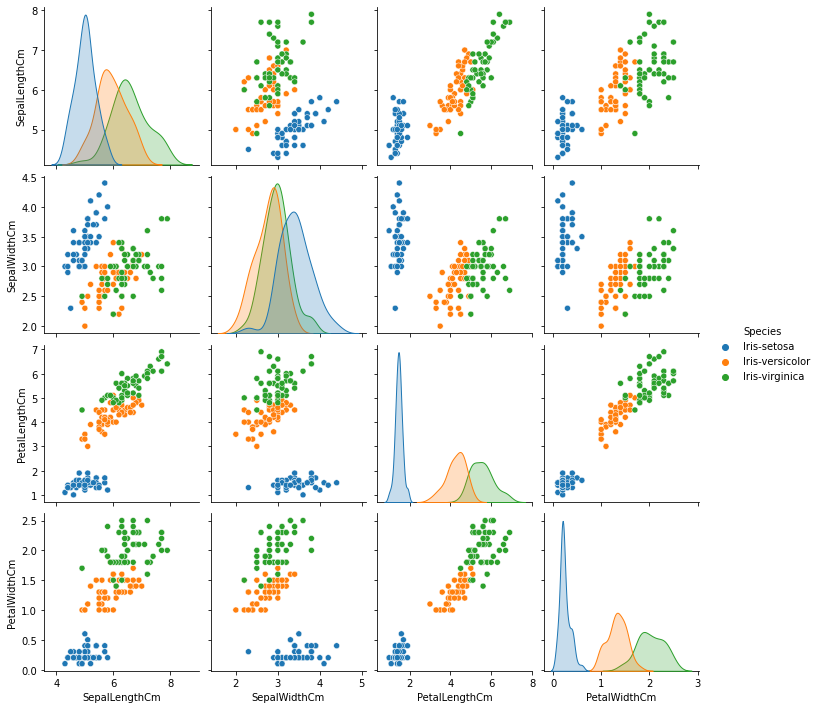

In [19]:
sns.pairplot(df,hue="Species")

Setosa is <span class="girk">easily separable among three</span>. Versicolor and Virgininca <span class="mark">doesn't separate out</span> that nicely into different cluster.

**KDE distribution of features**

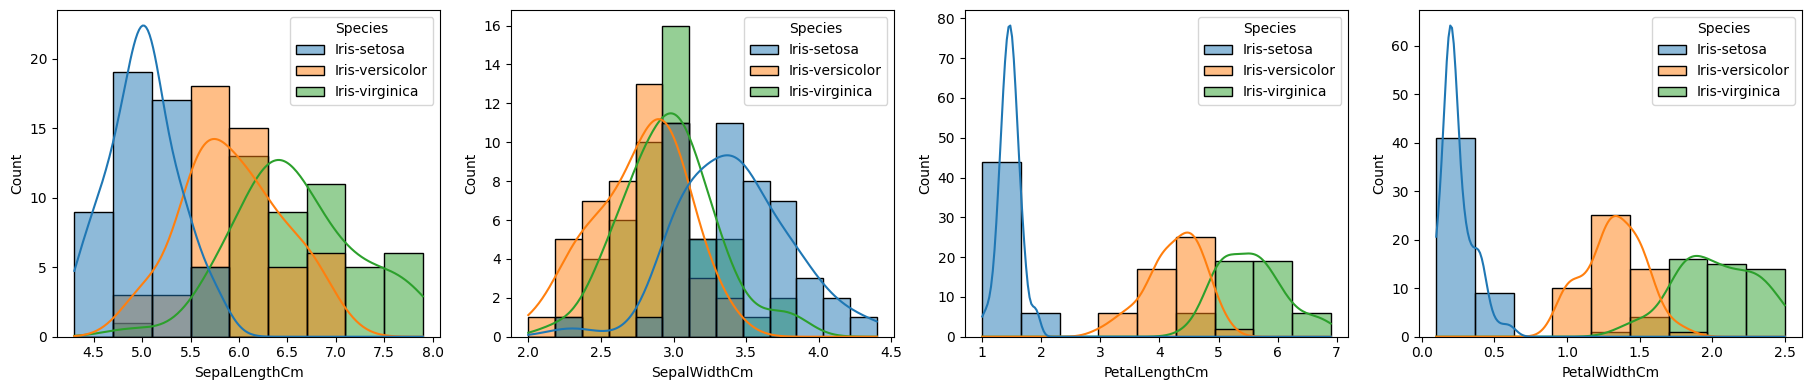

In [20]:
plt.figure(figsize=(50, 4), dpi=100)
i = 1

for col in df.columns[:-1]:
    plt.subplot(1, 11, i)
    sns.histplot(df, x=col, hue='Species', kde=True)
    i = i + 1
plt.tight_layout()
plt.show()

# Decision tree Classifier

## Data Pre-processing

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

X = df.iloc[:, :-1].values
y = le.fit_transform(df['Species'])

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
X.shape, y.shape

((150, 4), (150,))

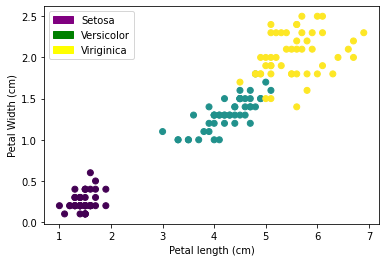

In [40]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=y)

setosa = mpatches.Patch(color='purple', label='Setosa')
versicolor = mpatches.Patch(color='green', label='Versicolor')
virginica = mpatches.Patch(color='yellow', label='Viriginica')

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(handles=[setosa, versicolor, virginica])

## Decision tree classifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=2021)

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test,
                            y_pred,
                            target_names=["Setosa", 
                                          "Versicolor", 
                                          "Virginica"]))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      0.95      0.97        19
   Virginica       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



**Accuracy of model**

In [43]:
print("Accuracy of decision tree classifier :",round(sum(y_pred == y_test) * 100 / len(y_pred), 2))

Accuracy of decision tree classifier : 98.0


## Visualization decision tree

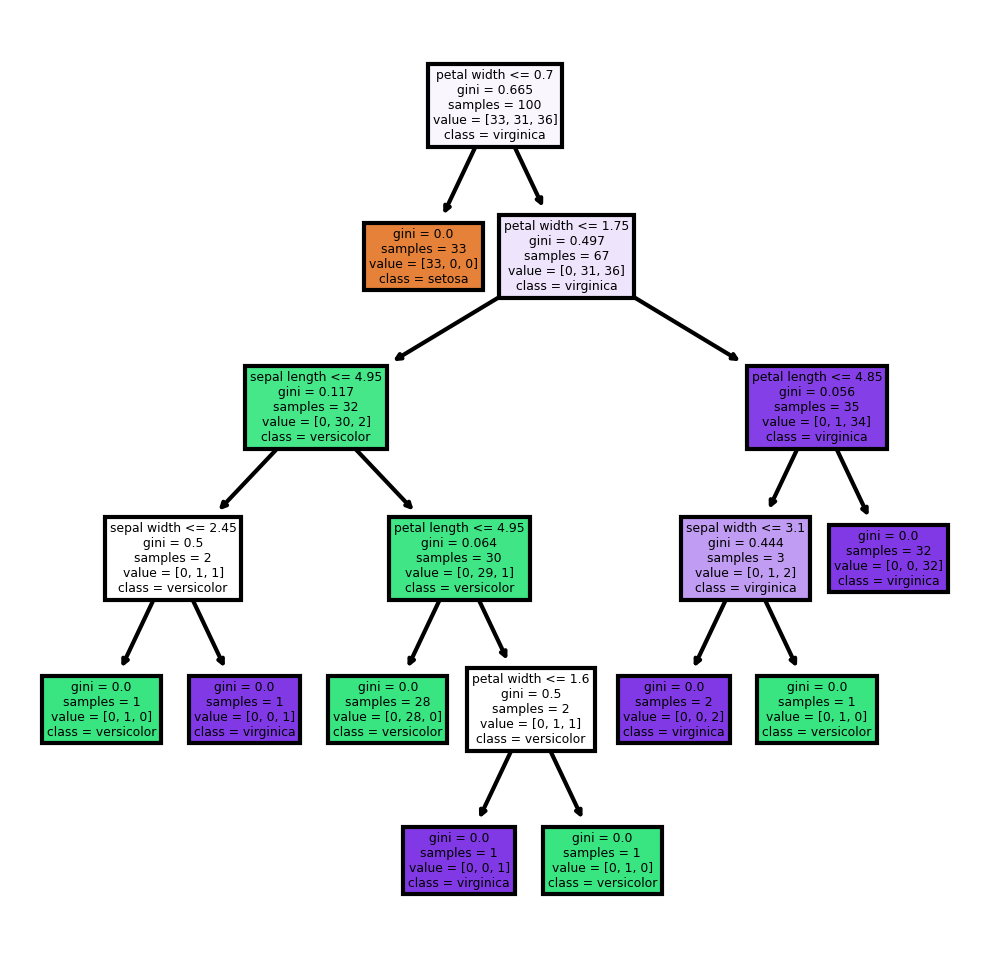

In [45]:
from sklearn import tree

fn = ['sepal length', 'sepal width', 'petal length', 'petal width']
cn = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

tree.plot_tree(tree_classifier, feature_names=fn, class_names=cn, filled=True);

## Observing misclassification

In [46]:
cross = pd.crosstab(y_test,
                    y_pred,
                    colnames=["Predicted"],
                    rownames=["Original"])

In [47]:
cross.rename({
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
},
             axis='index',
             inplace=True)

cross.rename({
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
},
             axis='columns')

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
Original,,,
Iris-setosa,17,0,0
Iris-versicolor,0,18,1
Iris-virginica,0,0,14


Decision tree correctly predicted <span class="girk">setosa and virginica with 0 misclassification</span>. However, decision tree <span class="mark">misidentified 1 data point from versicolor set</span> as virginica.

# Thank you